In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
!ls

config.json	     Linear_Interpolation_Check.ipynb	 old_scripts
Dataset_Check.ipynb  main_no_sync_node_interpolation.py


In [12]:
working_folder= '2024_10_14_15_54_28'

df_acc = pd.read_csv(f'./Output/{working_folder}/mav0/imu0/acc_data.csv')
df_gyro = pd.read_csv(f'./Output/{working_folder}/mav0/imu0/gyro_data.csv')
df_interpol = pd.read_csv(f'./Output/{working_folder}/mav0/imu0/data.csv')

In [13]:
df_acc

,#timestamp [ns],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2]
0,1728935669388470784,0.239420,-0.019154,9.500193
1,1728935669392013056,0.277727,-0.047884,9.490616
2,1728935669400537856,0.248997,-0.038307,9.490616
3,1728935669404066048,0.248997,-0.067038,9.490616
4,1728935669407442176,0.248997,-0.047884,9.500193
...,...,...,...,...
12321,1728935730963936000,0.210690,-0.067038,9.519346
12322,1728935730967840000,0.201113,-0.076614,9.500193
12323,1728935730971548160,0.191536,-0.067038,9.509769
12324,1728935730979739904,0.201113,-0.076614,9.490616


In [14]:
df_gyro

,#timestamp [ns],w_RS_S_x [rad s^-1],w_RS_S_y [rad s^-1],w_RS_S_z [rad s^-1]
0,1728935669390331136,0.004261,0.001065,-0.002131
1,1728935669395196928,0.003196,0.000000,0.003196
2,1728935669400032000,0.005326,0.001065,0.000000
3,1728935669405140992,0.003196,-0.002131,0.002131
4,1728935669410298112,0.001065,-0.005326,-0.002131
...,...,...,...,...
12321,1728935730964848128,0.005326,-0.002131,0.000000
12322,1728935730969889024,0.002131,-0.004261,0.002131
12323,1728935730975369984,-0.001065,-0.008522,-0.002131
12324,1728935730980007936,-0.007457,-0.011718,0.004261


In [15]:
df_interpol

,#timestamp [ns],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2],w_RS_S_x [rad s^-1],w_RS_S_y [rad s^-1],w_RS_S_z [rad s^-1]
0,1728935669390331136,0.259539,-0.034242,9.495163,0.004261,0.001065,-0.002131
1,1728935669395196928,0.266997,-0.044307,9.490616,0.003196,0.000000,0.003196
2,1728935669400032000,0.250702,-0.038876,9.490616,0.005326,0.001065,0.000000
3,1728935669405140992,0.248997,-0.060939,9.493665,0.003196,-0.002131,0.002131
4,1728935669410298112,0.263016,-0.026856,9.514212,0.001065,-0.005326,-0.002131
...,...,...,...,...,...,...,...
12321,1728935730964848128,0.208452,-0.069275,9.514871,0.005326,-0.002131,0.000000
12322,1728935730969889024,0.195821,-0.071323,9.505485,0.002131,-0.004261,0.002131
12323,1728935730975369984,0.196004,-0.071506,9.500833,-0.001065,-0.008522,-0.002131
12324,1728935730980007936,0.201113,-0.074535,9.489923,-0.007457,-0.011718,0.004261


In [16]:
cols = ['a_RS_S_x [m s^-2]', 'a_RS_S_y [m s^-2]', 'a_RS_S_z [m s^-2]']

In [17]:
concatenated = pd.concat([df_interpol.assign(dataset='interpolated'), df_acc.assign(dataset='original')])

In [18]:
concatenated

,#timestamp [ns],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2],w_RS_S_x [rad s^-1],w_RS_S_y [rad s^-1],w_RS_S_z [rad s^-1],dataset
0,1728935669390331136,0.259539,-0.034242,9.495163,0.004261,0.001065,-0.002131,interpolated
1,1728935669395196928,0.266997,-0.044307,9.490616,0.003196,0.000000,0.003196,interpolated
2,1728935669400032000,0.250702,-0.038876,9.490616,0.005326,0.001065,0.000000,interpolated
3,1728935669405140992,0.248997,-0.060939,9.493665,0.003196,-0.002131,0.002131,interpolated
4,1728935669410298112,0.263016,-0.026856,9.514212,0.001065,-0.005326,-0.002131,interpolated
...,...,...,...,...,...,...,...,...
12321,1728935730963936000,0.210690,-0.067038,9.519346,NaN,NaN,NaN,original
12322,1728935730967840000,0.201113,-0.076614,9.500193,NaN,NaN,NaN,original
12323,1728935730971548160,0.191536,-0.067038,9.509769,NaN,NaN,NaN,original
12324,1728935730979739904,0.201113,-0.076614,9.490616,NaN,NaN,NaN,original


<Axes: xlabel='#timestamp [ns]', ylabel='a_RS_S_x [m s^-2]'>

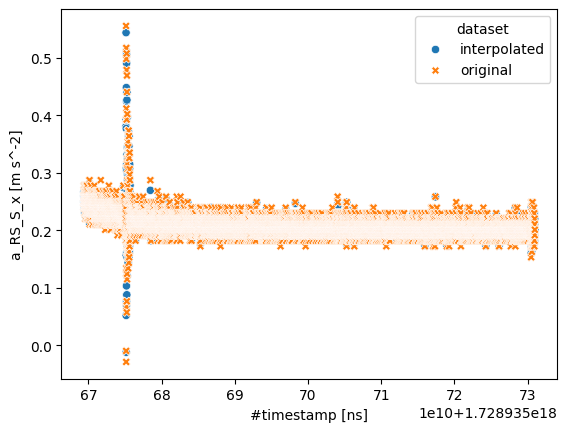

In [19]:
sns.scatterplot(x='#timestamp [ns]', y='a_RS_S_x [m s^-2]', data=concatenated, hue='dataset', style='dataset')

<Axes: xlabel='#timestamp [ns]', ylabel='a_RS_S_y [m s^-2]'>

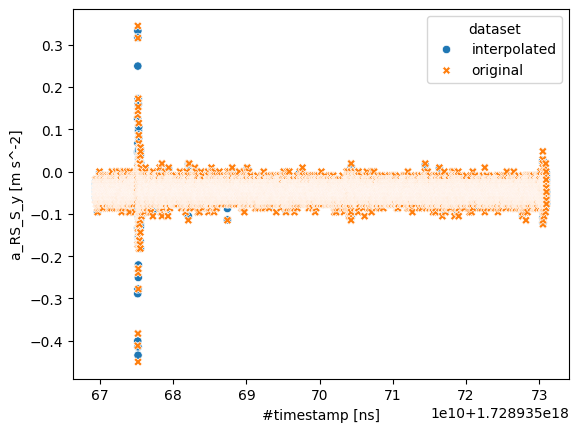

In [20]:
sns.scatterplot(x='#timestamp [ns]', y='a_RS_S_y [m s^-2]', data=concatenated, hue='dataset', style='dataset')

<Axes: xlabel='#timestamp [ns]', ylabel='a_RS_S_z [m s^-2]'>

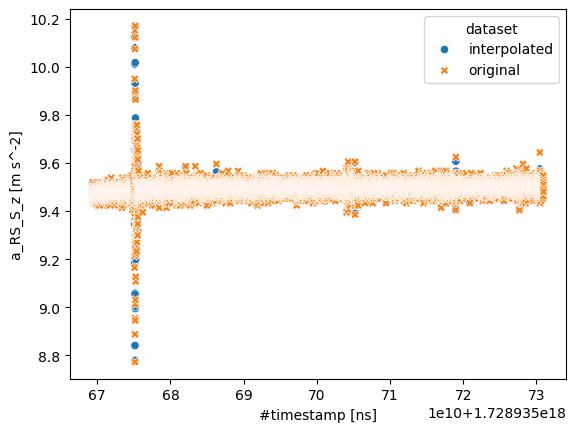

In [21]:
sns.scatterplot(x='#timestamp [ns]', y='a_RS_S_z [m s^-2]', data=concatenated, hue='dataset', style='dataset')

<Axes: xlabel='#timestamp [ns]', ylabel='a_RS_S_z [m s^-2]'>

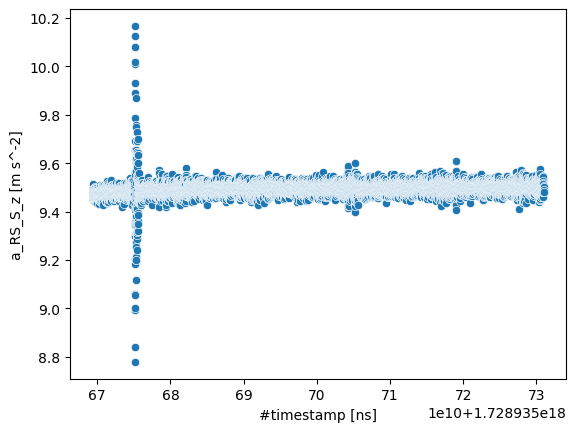

In [22]:
sns.scatterplot(x='#timestamp [ns]', y='a_RS_S_z [m s^-2]', data=df_interpol)